## Codigo fonte da implementação do landlab para shield stress
> https://github.com/landlab/landlab/blob/c930a865722cb5f4bc6e68afafe81eb9615fed57/landlab/components/stream_power/sed_flux_dep_incision.py

## Import dependencies

In [16]:
import os
from landlab.components import FlowAccumulator, FastscapeEroder,LinearDiffuser, ErosionDeposition, DepressionFinderAndRouter
from landlab import RasterModelGrid
import landlab
import numpy as np
import statistics 
from pylab import show, figure
from landlab.io import read_esri_ascii
from landlab import Component
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from landlab.io.esri_ascii import write_esri_ascii
import copy 
%matplotlib inline

## Load DEM

In [17]:
(mg, z) = read_esri_ascii("bacia_piratini_90m.asc", name="topographic__elevation")
(mg1, z1) = read_esri_ascii("bacia_piratini_90m.asc", name="topographic__elevation")
mg.at_node.keys()#lista os grids contidos no DEM

['topographic__elevation']

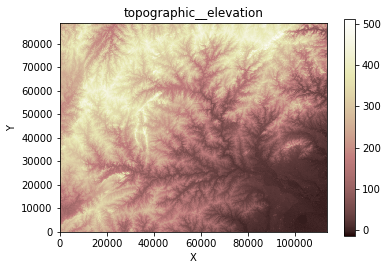

In [18]:
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation') #mostra o DEM

### define boundary conditions

In [19]:
mg.BC_LINK_IS_FIXED
#mg.set_fixed_value_boundaries_at_grid_edges(right, top, left, bottom)
mg.set_fixed_value_boundaries_at_grid_edges(True, True, True, True)

## Create shear stress component

## instantiate components

In [25]:
fr = FlowAccumulator(mg, flow_director='D8') 
sp = FastscapeEroder(mg, K_sp=0.001, m_sp=0.5, n_sp=1.0, threshold_sp= 0.0)
df = DepressionFinderAndRouter(mg)
#df = DepressionFinderAndRouter(mg)

## Run Components

In [26]:
# uplift_rate = 0.0001\
time_step = 10 
fr.run_one_step()
sp.run_one_step(time_step)
for i in range(1,2):
    print(i)
    fr.run_one_step()
    df.map_depressions()
    flooded = np.where(df.flood_status==3)[0] # ver pra que serve

# for i in range(1,10):
#     print(i)
#     fr.run_one_step()


1


In [27]:
mg.at_node.keys()

['topographic__elevation',
 'water__unit_flux_in',
 'drainage_area',
 'flow__data_structure_delta',
 'flow__upstream_node_order',
 'surface_water__discharge',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'flow__sink_flag',
 'depression__depth',
 'depression__outlet_node',
 'is_pit',
 'flood_status_code']

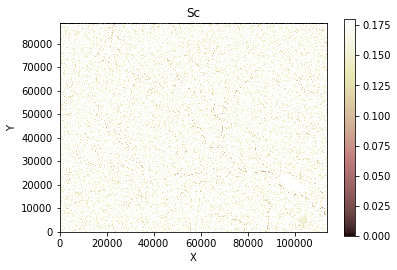

In [67]:
landlab.plot.imshow.imshow_grid_at_node(mg, 'Sc')

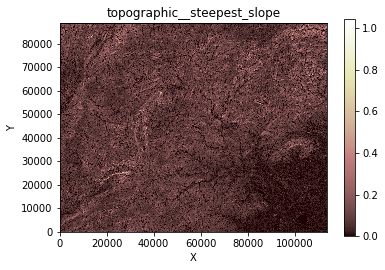

In [68]:
landlab.plot.imshow.imshow_grid_at_node(mg, 'topographic__steepest_slope')

In [48]:
da = mg.at_node['drainage_area']
da 

array([     0.,  16200.,   8100., ...,      0.,      0.,      0.])

In [60]:
b = 0.000008
k = 0.0001
p = 0.3
m = 0.4
n = 1

Sc = ((b/k) * da**(p-m))** 0.5
Sc

<ipython-input-60-092a3dd29e69>:7: RuntimeWarning: divide by zero encountered in power
  Sc = ((b/k) * da**(p-m))** 0.5


array([        inf,  0.17420846,  0.18035191, ...,         inf,
               inf,         inf])

In [62]:
Sc[Sc == np.inf] = 0

In [63]:
Sc

array([ 0.        ,  0.17420846,  0.18035191, ...,  0.        ,
        0.        ,  0.        ])

In [64]:
mg.add_field("Sc", Sc, at="node", copy=True, clobber=False)

array([ 0.        ,  0.17420846,  0.18035191, ...,  0.        ,
        0.        ,  0.        ])

In [77]:
ss = mg.at_node['topographic__steepest_slope']

In [81]:
len(da[Sc <ss])

99656

In [78]:
len(ss)

1250529